<a href="https://colab.research.google.com/github/Samgomes2510/Projeto_arvore_decisao/blob/main/Projeto_Credit_Score_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto de Credit Score - Naive Bayes**


Nessa aula aplicaremos o algoritmo de naive bayes afim de tentarmos trazer previsões do score de crédito.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay

# **1) Comece carregando as bases de treino (X e y) e teste (X e y).**
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.


In [ ]:
X_test = pd.read_csv("x_test.csv", delimiter=',')
X_train = pd.read_csv("x_train_balanced.csv", delimiter=',')
y_train = pd.read_csv("y_train_balanced.csv", delimiter=',')
y_test = pd.read_csv("y_test.csv", delimiter=',')

In [ ]:
X_test

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Genero_Encoder,Pais_GERMANY,Pais_SPAIN
0,686,36.0,3,95848.58,2,0.0,1.0,7144694.0,1,False,False
1,703,35.0,1,0.00,1,1.0,1.0,14136462.0,1,False,False
2,730,26.0,6,0.00,1,1.0,1.0,1011687.0,1,False,True
3,675,33.0,6,0.00,2,0.0,1.0,1011687.0,0,False,False
4,754,24.0,3,121513.31,2,0.0,1.0,1011687.0,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...
24922,786,37.0,4,0.00,2,0.0,1.0,1011687.0,0,False,True
24923,592,35.0,7,122724.50,1,1.0,1.0,17773874.0,1,False,False
24924,645,45.0,7,121286.32,1,1.0,1.0,869372.0,1,False,False
24925,567,47.0,1,126447.40,1,1.0,0.0,1011687.0,0,True,False


In [ ]:
y_test

,Churn
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
24922,0.0
24923,0.0
24924,0.0
24925,1.0


In [ ]:
y_train

,Churn
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
117945,1.0
117946,1.0
117947,1.0
117948,1.0


In [ ]:
X_train

,Credit_Score,Idade,Tempo_Credito,Balanco,Qtd_Produtos,Possui_Cartao,Membro_Ativo,Salario_Anual,Genero_Encoder,Pais_GERMANY,Pais_SPAIN
0,711,35.000000,10,0.000000,2,1.000000,0.000000,5331178.0,1,False,False
1,619,33.000000,7,0.000000,2,0.000000,1.000000,1011687.0,1,False,False
2,841,54.000000,4,102721.490000,1,1.000000,1.000000,1011687.0,1,True,False
3,679,48.000000,6,125161.240000,1,1.000000,0.000000,579659.0,1,False,False
4,656,42.000000,6,0.000000,3,0.000000,0.000000,14233155.0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...
117945,529,43.000000,7,0.000000,1,0.514157,0.000000,1011687.0,1,False,True
117946,639,44.450575,7,0.000000,1,1.000000,0.725287,1011687.0,0,False,True
117947,541,49.890057,6,102744.063633,1,1.000000,0.000000,1011687.0,0,True,False
117948,593,37.911470,5,139949.785268,1,1.000000,0.000000,1011687.0,0,True,False


# **2) Aplique o algoritmo de Naive Bayes aos dados de treinamento.**


In [ ]:
modelo_nb = GaussianNB()
modelo_nb.fit(X_train, y_train)

GaussianNB()

# **3) Faça a avaliação do modelo com os dados de treinamento.**
Traga a acurácia, recall e plote a matriz de confusão. Não se esqueça de avaliar com suas palavras o desempenho do modelo, interpretando as métricas.


In [ ]:
# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test, average='macro')

print("Acurácia:", accuracy)
print("Recall:", recall)

Acurácia: 0.555261363180487
Recall: 0.5891652479800337


✅ Acurácia - Treino: 0.59
🔁 Recall (macro) - Treino: 0.59


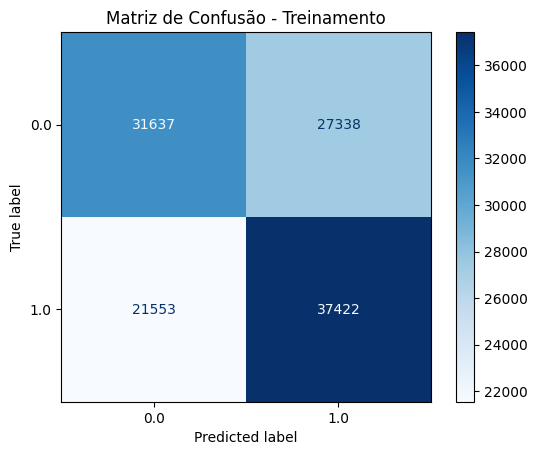

In [ ]:
# Avaliação com dados de treino
y_pred_train = modelo_nb.predict(X_train)

# Calcular a acurácia
acc_train = accuracy_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train, average='macro')
print(f"✅ Acurácia - Treino: {acc_train:.2f}")
print(f"🔁 Recall (macro) - Treino: {recall_train:.2f}")

# Matriz de Confusão - Treino
cm_train = confusion_matrix(y_train, y_pred_train)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=np.unique(y_train))
disp_train.plot(cmap='Blues')
plt.title("Matriz de Confusão - Treinamento")
plt.show()


✅ Insight:

🟡 1. Desempenho Fraco, mas não aleatório

Um modelo aleatório com várias classes poderia ter um desempenho muito abaixo de 59%.

Isso sugere que o modelo está aprendendo algum padrão, mas não o suficiente para ser confiável em produção.

🔄 2. Modelo pode estar sofrendo com ruído ou dados insuficientes

É possível que as variáveis preditoras não tenham relação forte com o score.

Pode haver dados ruidosos, desequilíbrio residual ou falta de transformação adequada das variáveis.

⚖️ 3. Baixa capacidade de generalização

Mesmo na base de treino, o modelo não performa bem. Ou seja, não é overfitting, e sim underfitting: o modelo é simples demais (como o Naive Bayes costuma ser), e não está captando bem os padrões dos dados.

# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados, da mesma forma que fez acima. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.


✅ Acurácia - Teste: 0.56
🔁 Recall (macro) - Teste: 0.59


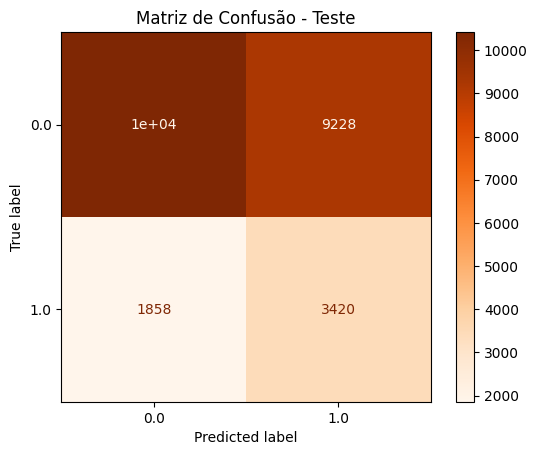

In [ ]:
# Avaliação com dados de teste
y_pred_test = modelo_nb.predict(X_test)

acc_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test, average='macro')
print(f"✅ Acurácia - Teste: {acc_test:.2f}")
print(f"🔁 Recall (macro) - Teste: {recall_test:.2f}")

# Matriz de Confusão - Teste
cm_test = confusion_matrix(y_test, y_pred_test)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=np.unique(y_test))
disp_test.plot(cmap='Oranges')
plt.title("Matriz de Confusão - Teste")
plt.show()


📌 Principais Insights:

🔸 Modelo estável, mas fraco

A proximidade das métricas indica estabilidade, mas os valores abaixo de 60% apontam que o modelo não consegue capturar bem os padrões dos dados.

🔸 Naive Bayes pode estar limitado

É um modelo simples, com hipóteses fortes (como independência entre atributos), o que pode não refletir a realidade dos dados de crédito, que geralmente envolvem relações mais complexas.

🔸 Bom ponto de partida

Apesar dos resultados fracos, o Naive Bayes serve como baseline (modelo de referência). Modelos mais robustos provavelmente irão performar melhor.


📈 Conclusão:

O modelo Naive Bayes apresentou desempenho semelhante em treino e teste, o que é bom em termos de estabilidade. No entanto, a acurácia e o recall relativamente baixos sugerem que ele não é o modelo ideal para previsões confiáveis de score de crédito.


# 5) Descreva com suas palavras o projeto desenvolvido nessa atividade e qual o nosso objetivo principal ao aplicarmos o algoritmo de naive bayes a base de crédito.
Utilize pelo menos 4 linhas.

Neste projeto, aplicamos o algoritmo Naive Bayes para prever o score de crédito de clientes com base em variáveis previamente tratadas e preparadas. Realizamos o pré-processamento, incluindo o balanceamento das classes, transformação de variáveis categóricas e divisão da base em treino e teste. O objetivo principal foi verificar se o modelo é capaz de classificar corretamente os perfis de crédito utilizando um algoritmo probabilístico simples. Embora o desempenho tenha sido modesto, a aplicação serviu como uma linha de base (baseline) para futuras comparações com modelos mais complexos.